In [1]:
%reset -f

Data loading

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [3]:
training_set = pd.read_csv("data/training_set_VU_DM.csv", index_col=0)
test_set = pd.read_csv("data/test_set_VU_DM.csv", index_col=0)

# TASK 1: BUSINESS UNDERSTANDING

Your task is to predict what hotels properties listed as a result of a hotel search a user is most likely to click on. Of course, more people have worked on such predictions. Can you find some other people that have tried to make such predictions (e.g. from the Kaggle compe- tition)? And what have they used as most prominent predictors? Have other people that participate in the competition mentioned anything about their approaches? Please spend a couple of paragraphs on this topic (i.e. related work) in your report.


# TASK 2: DATA UNDERSTANDING

Essentially, this is a subtask that requires you do exploratory data analysis (EDA). Explore the dataset, count, summarize, plot things, and report findings that are useful for your task. Remember that EDA is not necessary done once and then you move on. It might very well be possible that you do some EDA, build some models, then some idea comes up, do some more EDA, modify your model according to what it shows, and so on.

In [4]:
training_set.head()

,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
srch_id,,,,,,,,,,,,,,,,,,,,,
1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,1,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [5]:
training_set.shape

(4958347, 53)

In [6]:
columns = training_set.columns
index = training_set.index.unique()

print((training_set.index.nunique()))

199795


In [7]:
# counts per index per column
count_data = (training_set.groupby(training_set.index).count())
count_data.head(10)
#count_data.to_csv("outputs/count_data.csv")

,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
srch_id,,,,,,,,,,,,,,,,,,,,,
1,28,28,28,0,0,28,28,28,28,28,...,0,0,0,0,26,26,10,28,1,28
4,32,32,32,0,0,32,32,32,32,32,...,0,0,0,0,1,1,0,32,0,32
6,5,5,5,0,0,5,5,5,5,5,...,0,0,0,0,0,0,0,5,1,5
8,21,21,21,0,0,21,21,21,21,21,...,0,0,0,0,16,19,2,21,1,21
11,33,33,33,0,0,33,33,33,33,33,...,0,0,0,0,29,29,9,33,0,33
12,28,28,28,0,0,28,28,28,28,28,...,0,0,0,0,0,0,0,28,0,28
17,31,31,31,0,0,31,31,31,31,31,...,8,18,21,8,0,0,0,31,0,31
21,29,29,29,0,0,29,29,29,29,29,...,0,0,0,0,0,0,0,29,1,29
25,33,33,33,0,0,33,33,33,33,33,...,0,0,0,0,31,31,2,33,1,33


In [8]:
sum_data = (training_set.groupby(training_set.index).sum())
sum_data.head(10)

/var/folders/9j/5bfcvwzx4dq156jh1d694vk80000gn/T/ipykernel_5774/445997755.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_data = (training_set.groupby(training_set.index).sum())


,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
srch_id,,,,,,,,,,,,,,,,,,,,,
1,336,5236,0.0,0.0,6132,1963268,86,97.5,26,64.39,...,0.0,0.0,0.0,0.0,-2.0,0.0,126.0,1,114.29,1
4,160,7008,0.0,0.0,7008,2490803,99,125.0,12,80.13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.00,0
6,70,500,0.0,0.0,500,308387,7,15.5,3,9.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,162.38,1
8,105,4599,0.0,0.0,4599,1223314,64,82.5,19,38.54,...,0.0,0.0,0.0,0.0,0.0,5.0,50.0,1,96.41,1
11,165,7227,0.0,0.0,7227,2183576,92,131.5,29,53.26,...,0.0,0.0,0.0,0.0,-2.0,-1.0,114.0,1,0.00,0
12,140,6132,0.0,0.0,4424,2107303,101,83.5,5,71.80,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.00,0
17,558,3999,0.0,0.0,961,2128939,109,122.5,2,210.34,...,105.0,4.0,4.0,428.0,0.0,0.0,0.0,1,0.00,0
21,435,1595,0.0,0.0,6264,1803812,84,79.5,0,110.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,222.58,1
25,165,7227,0.0,0.0,7227,2434942,96,127.5,22,70.29,...,0.0,0.0,0.0,0.0,0.0,0.0,23.0,1,47.10,1


In [9]:
print( sum_data[(sum_data["click_bool"] == sum_data["booking_bool"])].shape[0] )


129879


In [10]:
sum_NC_NB = sum_data[(sum_data["click_bool"]==0) & (sum_data["booking_bool"]==0)].shape[0]
sum_NC_B = sum_data[(sum_data["click_bool"]==0) & (sum_data["booking_bool"]==1)].shape[0]
sum_C_NB = sum_data[(sum_data["click_bool"]==1) & (sum_data["booking_bool"]==0)].shape[0]
sum_C_B = sum_data[(sum_data["click_bool"]==1) & (sum_data["booking_bool"]==1)].shape[0]

print("No activity:",sum_NC_NB) 
print("no clicks, booked:",sum_NC_B)
print("clicked:",sum_C_NB)
print("clicked and booked:",sum_C_B)
print("Activity:",sum_C_NB+sum_C_B)

# all searches resulted in activity and many in 

No activity: 0
no clicks, booked: 0
clicked: 56885
clicked and booked: 129879
Activity: 186764


In [11]:
# class balance

count_NC_NB = training_set[(training_set["click_bool"]==0) & (training_set["booking_bool"]==0)].shape[0]
count_NC_B = training_set[(training_set["click_bool"]==0) & (training_set["booking_bool"]==1)].shape[0]
count_C_NB = training_set[(training_set["click_bool"]==1) & (training_set["booking_bool"]==0)].shape[0]
count_C_B = training_set[(training_set["click_bool"]==1) & (training_set["booking_bool"]==1)].shape[0]

print("No activity:",count_NC_NB) 
print("no clicks, booked:",count_NC_B)
print("clicked:",count_C_NB)
print("clicked and booked:",count_C_B)
print("Activity:",count_C_NB+count_C_B)

# should we consider balance between 3 states: no activity, clicked, booked ? Or even no activity vs activity ?

No activity: 4736468
no clicks, booked: 0
clicked: 83489
clicked and booked: 138390
Activity: 221879


# TASK 3: DATA PREPARATION

You’ll certainly need to work on the dataset, to create, modify or add new features. For in- stance, you might want to compare the different properties that resulted from the search instead of learning from them one by one. There are certain attributes with a large amount of missing values, do they still provide useful information? And how will you handle a missing value if this shows to be the case? Finally, in order to test your approach (since you do not know the answers for the test set) you will need to split up your data to test your approach yourself before you generate your answers on our test set. Of course, you are also allowed to use external data sources if you find ones that are useful.

In [12]:
# feature engineering
def func(row):
    if row["booking_bool"]==1:
        return 5
    elif row["click_bool"]==1:
        return 1
    else:
        return 0

training_set['Score_new'] = training_set.apply(func, axis=1)

training_set.head(10)

,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,Score_new
srch_id,,,,,,,,,,,,,,,,,,,,,
1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,1,...,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0,0
1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,1,...,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0,0
1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,1,...,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0,0
1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,1,...,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0,0
1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,1,...,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0,0
1,2013-04-04 08:32:15,12,187,NaN,NaN,219,30184,4,4.5,1,...,NaN,NaN,NaN,0.0,0.0,7.0,0,NaN,0,0
1,2013-04-04 08:32:15,12,187,NaN,NaN,219,44147,3,3.5,1,...,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0,0
1,2013-04-04 08:32:15,12,187,NaN,NaN,219,50984,2,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0
1,2013-04-04 08:32:15,12,187,NaN,NaN,219,53341,4,4.0,1,...,NaN,NaN,NaN,0.0,0.0,6.0,0,NaN,0,0


In [16]:
training_set = training_set.drop(['booking_bool', 'click_bool'], axis=1)
training_set.head(10)



,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,gross_bookings_usd,Score_new
srch_id,,,,,,,,,,,,,,,,,,,,,
1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,1,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0
1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,1,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0
1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,1,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0
1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,1,...,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,NaN,0
1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,1,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0
1,2013-04-04 08:32:15,12,187,NaN,NaN,219,30184,4,4.5,1,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,7.0,NaN,0
1,2013-04-04 08:32:15,12,187,NaN,NaN,219,44147,3,3.5,1,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0
1,2013-04-04 08:32:15,12,187,NaN,NaN,219,50984,2,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2013-04-04 08:32:15,12,187,NaN,NaN,219,53341,4,4.0,1,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,6.0,NaN,0


/var/folders/9j/5bfcvwzx4dq156jh1d694vk80000gn/T/ipykernel_5774/4115485266.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = training_set.corr()


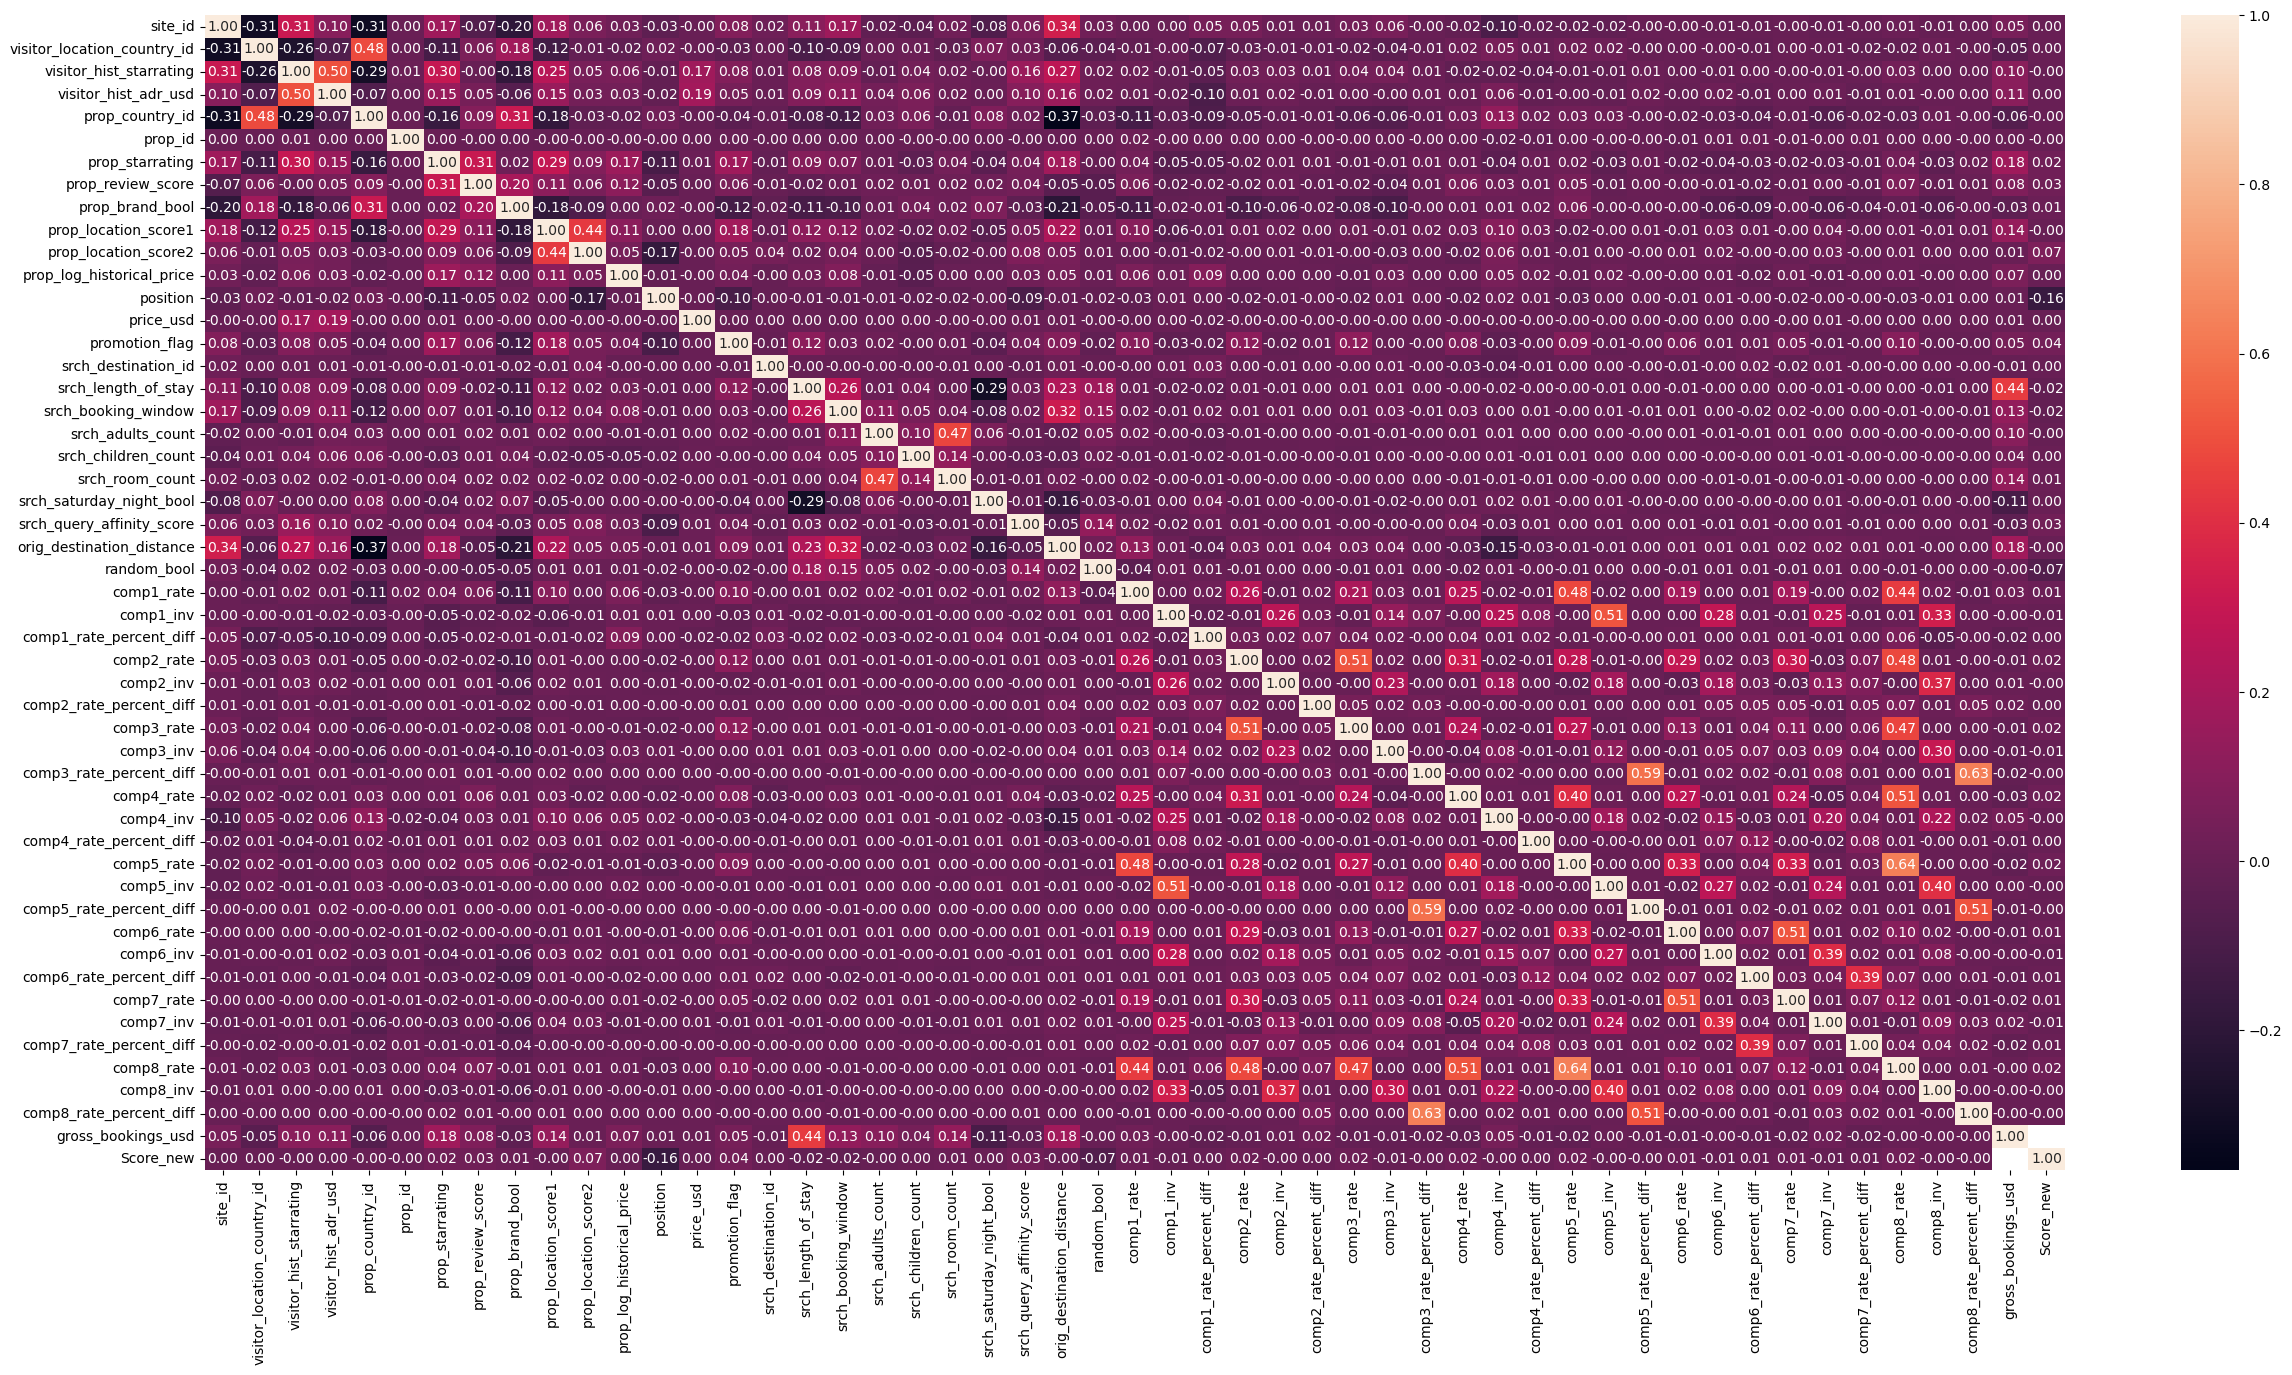

<class 'pandas.core.frame.DataFrame'>


In [20]:
# correlation
corr_matrix = training_set.corr()
plt.figure(figsize=(30, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()
print (type(corr_matrix))

In [21]:
corr_matrix.to_csv('outputs/correlation.csv')

In [30]:
corr_matrix_abs = np.abs(corr_matrix)
scores_abs = corr_matrix_abs['Score_new']
scores_abs = scores_abs.sort_values(ascending=False)
print(scores_abs)

Score_new                      1.000000
position                       0.158376
prop_location_score2           0.070919
random_bool                    0.069051
promotion_flag                 0.038404
srch_query_affinity_score      0.029747
prop_review_score              0.026291
prop_starrating                0.024481
comp8_rate                     0.024419
comp5_rate                     0.021775
comp4_rate                     0.018805
srch_length_of_stay            0.018702
comp2_rate                     0.016979
comp3_rate                     0.016724
srch_booking_window            0.015106
comp7_rate                     0.012599
comp6_rate                     0.012312
comp1_rate                     0.010056
prop_brand_bool                0.008139
comp1_inv                      0.008079
srch_room_count                0.008057
comp3_inv                      0.007529
comp7_inv                      0.006575
comp7_rate_percent_diff        0.006336
comp6_inv                      0.005916


# TASK 4: MODELING AND EVALUATION

Naturally, once you prepare the dataset, you should be able to build models. You have great freedom to select the techniques you feel are most appropriate, however you must at least use one technique that has been discussed during the lecture on Recommender Systems. The choice of that techniques or alternatives you try might be influenced by how we would like to measure your predictions at the end (described later in this document). To test how your model is compared to other, you can upload your answers for the test set on the in class Kaggle website: http://www.kaggle.com/competitions/vu-dmt-assigment-2-2023/ , see previous instructions for signing up using a different URL. Note that the score shown there is only for part of the test set, the score on the rest of the test set will only be disclosed on the final lecture and will form part of your final grade.

# TASK 5: DEPLOYMENT

While we do not go into real deployment, we do want you to go into a brief discussion on how Expedia could use your approach to deploy it on their systems in a scalable way, knowing that they have much more data available and also that the characteristics of the data can change over time. Discuss this in the light of the methods that have been introduced in the big data engineering and big data infrastructures lectures.